In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("Fish.csv")
df_sub = df[["Height", "Weight"]]

In [6]:
def sgd_scratch(x, y, alpha, epochs):
    theta_1 = np.random.random()
    thetas = [theta_1]
    for i in range(1,epochs):
        theta_1 = theta_1 - (alpha/len(x))*sum((x*theta_1 - y) * x)
        thetas.append(theta_1)

    l = []
    for theta in thetas:
        y_pred = x.values*theta
        l.append(y_pred)
    df_preds = pd.DataFrame(l).T

    return thetas, df_preds

In [42]:
coefs, df_y = sgd_scratch(df_sub.Height, df_sub.Weight, 0.001, 100)

In [43]:
print(f"Coeficiente encontrado: {round(coefs[-1],2)}")

Coeficiente encontrado: 47.38


<Figure size 432x288 with 0 Axes>

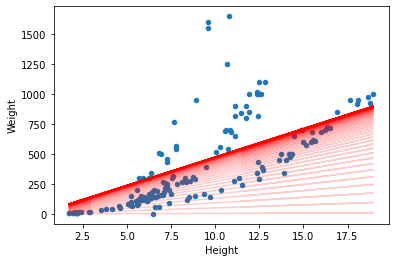

In [44]:
plt.figure()

df_sub.plot.scatter("Height", "Weight")

for col in df_y.columns:
    plt.plot(df_sub.Height, df_y[col], color = "r", alpha = 0.2)

plt.show()

Text(0.5, 1.0, 'Coeficiente X Número da iteração')

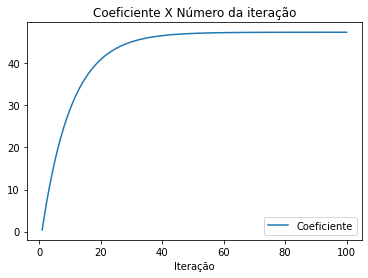

In [49]:
coefs_df = pd.DataFrame(coefs, columns = ["Coeficiente"])
coefs_df["Iteração"] = range(1, len(coefs_df)+1)

coefs_df.plot("Iteração", 0)

plt.title("Coeficiente X Número da iteração")